#
Are you a good detective?
###
Ваше завдання:

Зрозуміти алгоритм: 

Визначити, як розраховується EngagementScore на основі різних характеристик користувачів і постів. Дослідити, які фактори впливають на цей показник. +

Прогнозування непередбачуваного: оцініть, чи можна точно передбачити EngagementScore для новостворених постів.+
###
Результати:

Звіт у форматі PDF з відповідями на вищезазначені питання.

Посилання на відтворюваний код Python або блокнот Jupyter, що демонструє ваш аналіз.

In [2]:
import pandas as pd
from ydata_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [3]:
df = pd.read_csv('C:/test/task_1/y_posts.csv')

In [4]:
# Select numeric columns
numeric_columns = ['UserID', 'PostID', 'Age', 'Followers', 'PostHour', 'Likes', 'Shares', 'Comments']

# Initialize StandardScaler
scaler = MinMaxScaler()

# Fit scaler on the numeric data
scaler.fit(df[numeric_columns])

# Transform the numeric columns
df[numeric_columns] = scaler.transform(df[numeric_columns])

In [ ]:
df.head(10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UserID           5000 non-null   float64
 1   PostID           5000 non-null   float64
 2   Age              5000 non-null   float64
 3   Country          5000 non-null   object 
 4   Followers        5000 non-null   float64
 5   PostType         5000 non-null   object 
 6   PostHour         5000 non-null   float64
 7   PostWeekday      5000 non-null   object 
 8   Likes            5000 non-null   float64
 9   Shares           5000 non-null   float64
 10  Comments         5000 non-null   float64
 11  EngagementScore  5000 non-null   float64
dtypes: float64(9), object(3)
memory usage: 468.9+ KB


In [ ]:
df.describe()

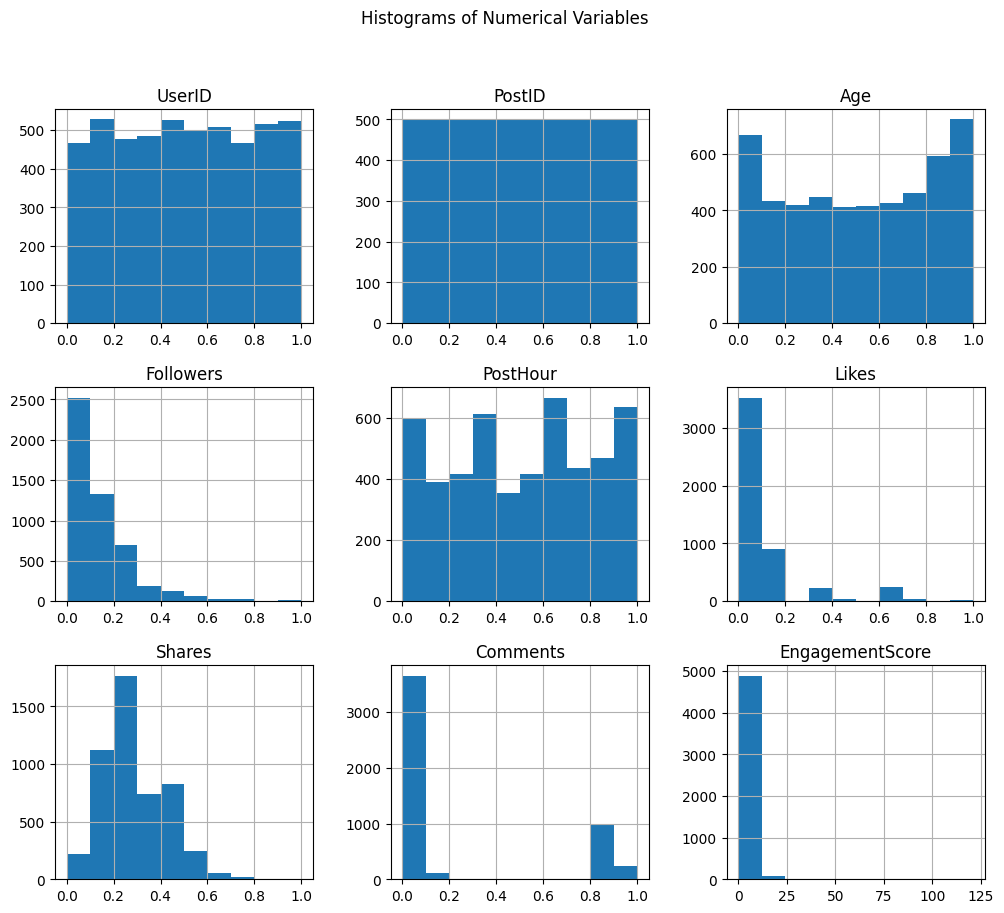

In [8]:
df.hist(figsize=(12, 10))
plt.suptitle('Histograms of Numerical Variables')
plt.show()

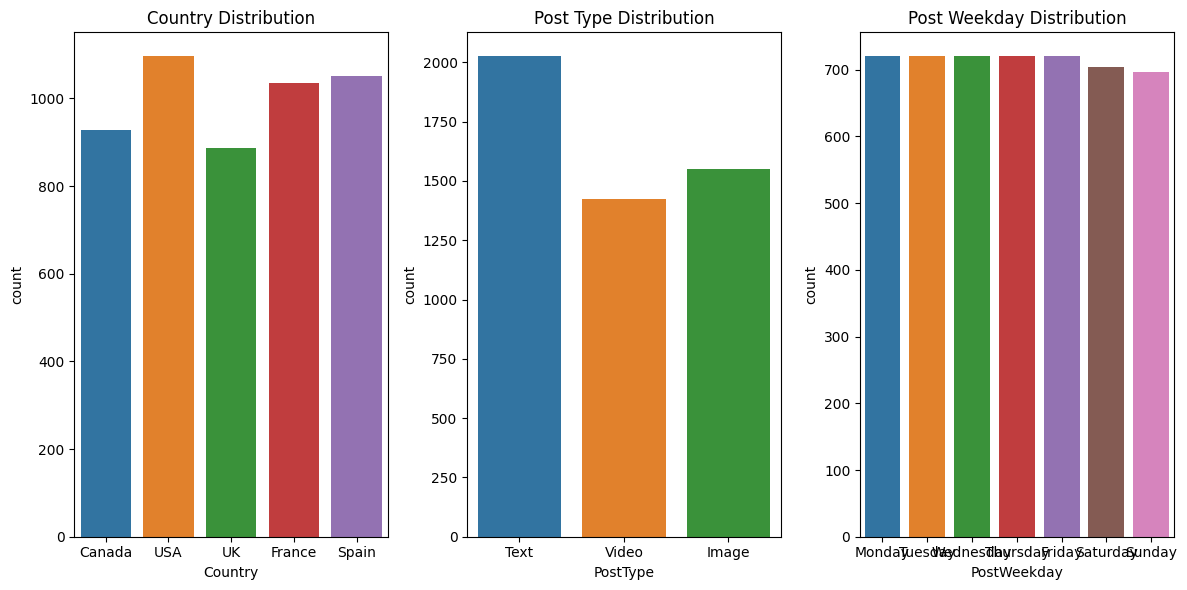

In [9]:
# Bar plots for categorical variables
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.countplot(x='Country', data=df)
plt.title('Country Distribution')
plt.subplot(1, 3, 2)
sns.countplot(x='PostType', data=df)
plt.title('Post Type Distribution')
plt.subplot(1, 3, 3)
sns.countplot(x='PostWeekday', data=df)
plt.title('Post Weekday Distribution')
plt.tight_layout()
plt.show()

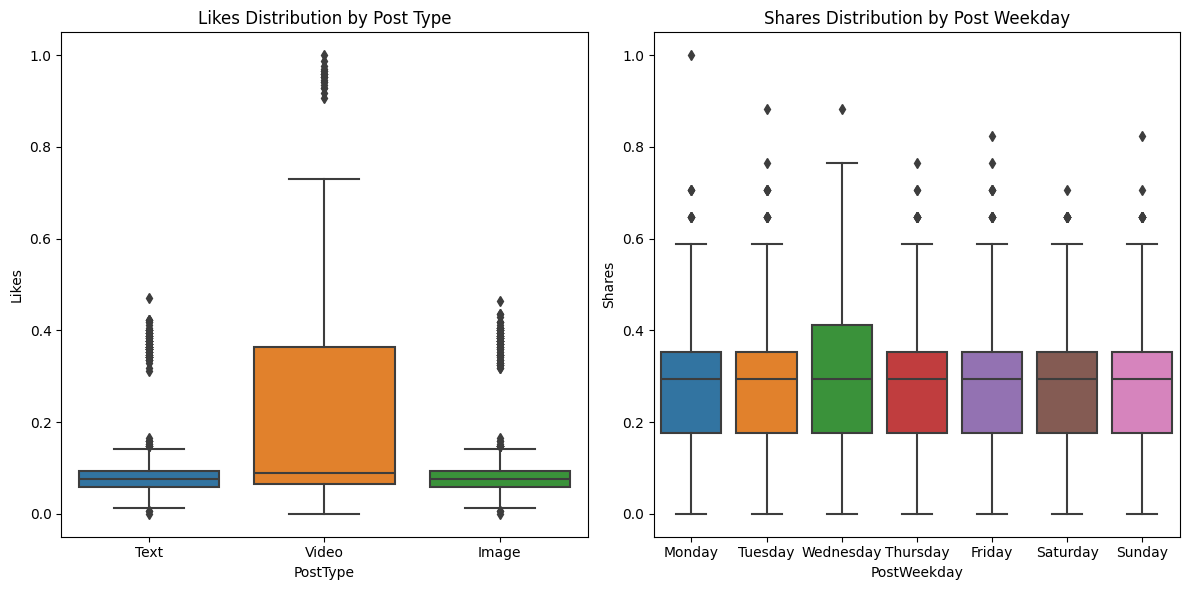

In [10]:
# Box plots to identify outliers and compare distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='PostType', y='Likes', data=df)
plt.title('Likes Distribution by Post Type')
plt.subplot(1, 2, 2)
sns.boxplot(x='PostWeekday', y='Shares', data=df)
plt.title('Shares Distribution by Post Weekday')
plt.tight_layout()
plt.show()

c:\Users\serge\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\serge\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\serge\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\serge\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

<Figure size 1200x600 with 0 Axes>

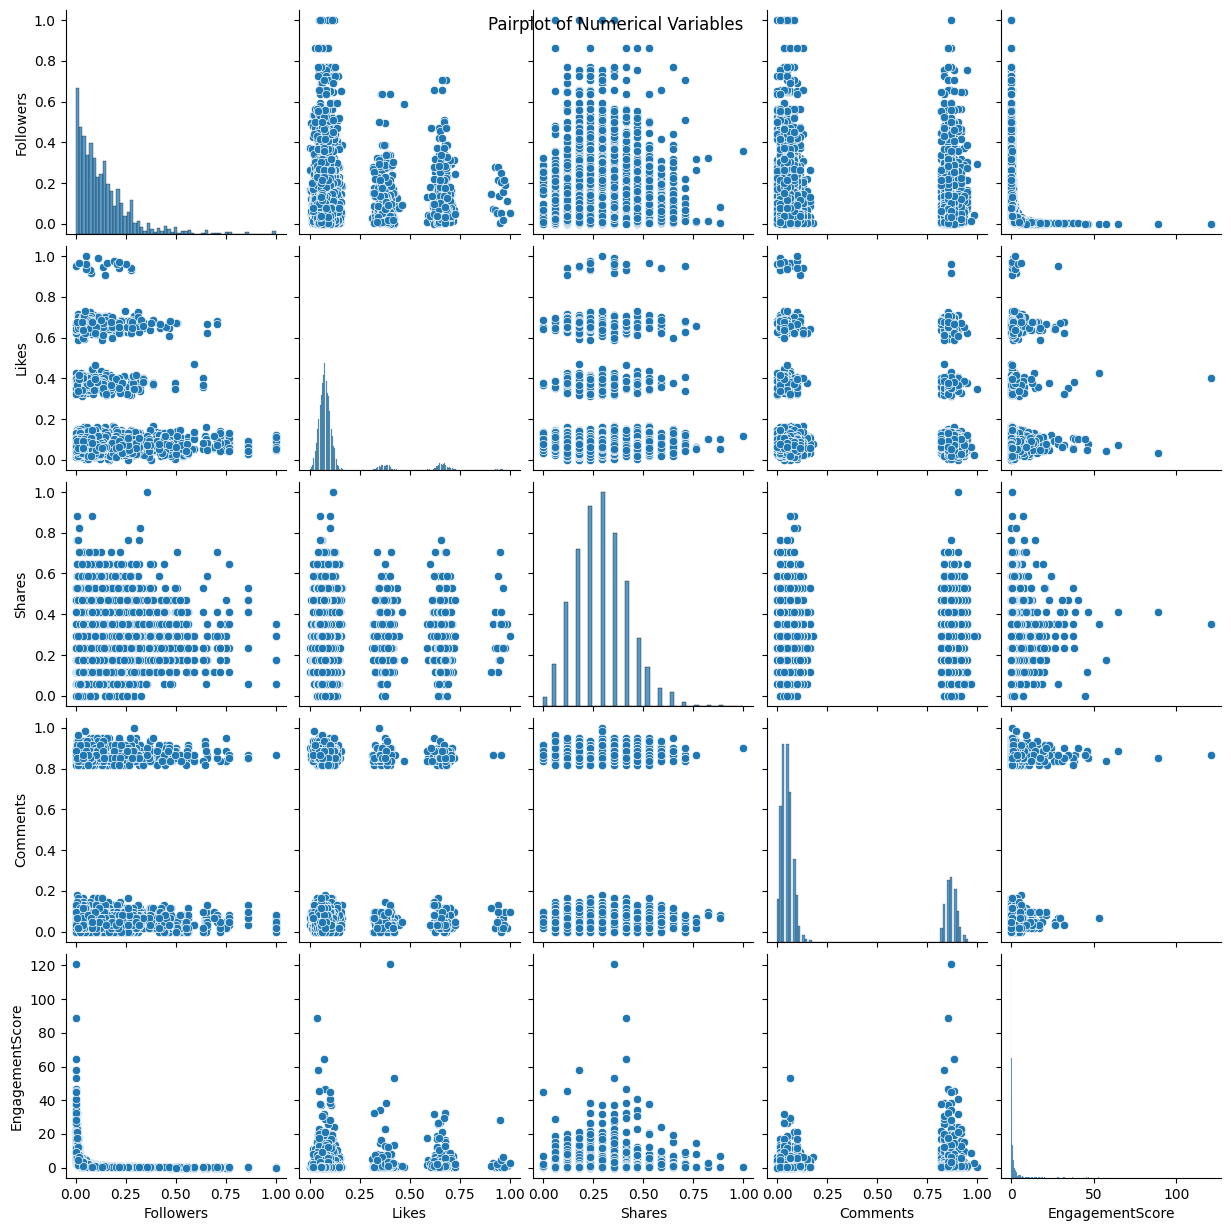

In [11]:
# Scatter plot to explore relationships between numerical variables
plt.figure(figsize=(12, 6))
sns.pairplot(df[['Followers', 'Likes', 'Shares', 'Comments', 'EngagementScore']])
plt.suptitle('Pairplot of Numerical Variables')
plt.show()

In [13]:
#profile = ProfileReport(df, title="Profiling Report")

In [14]:
#profile

In [15]:
encoded_df = pd.get_dummies(df, columns=['Country', 'PostType', 'PostWeekday'])

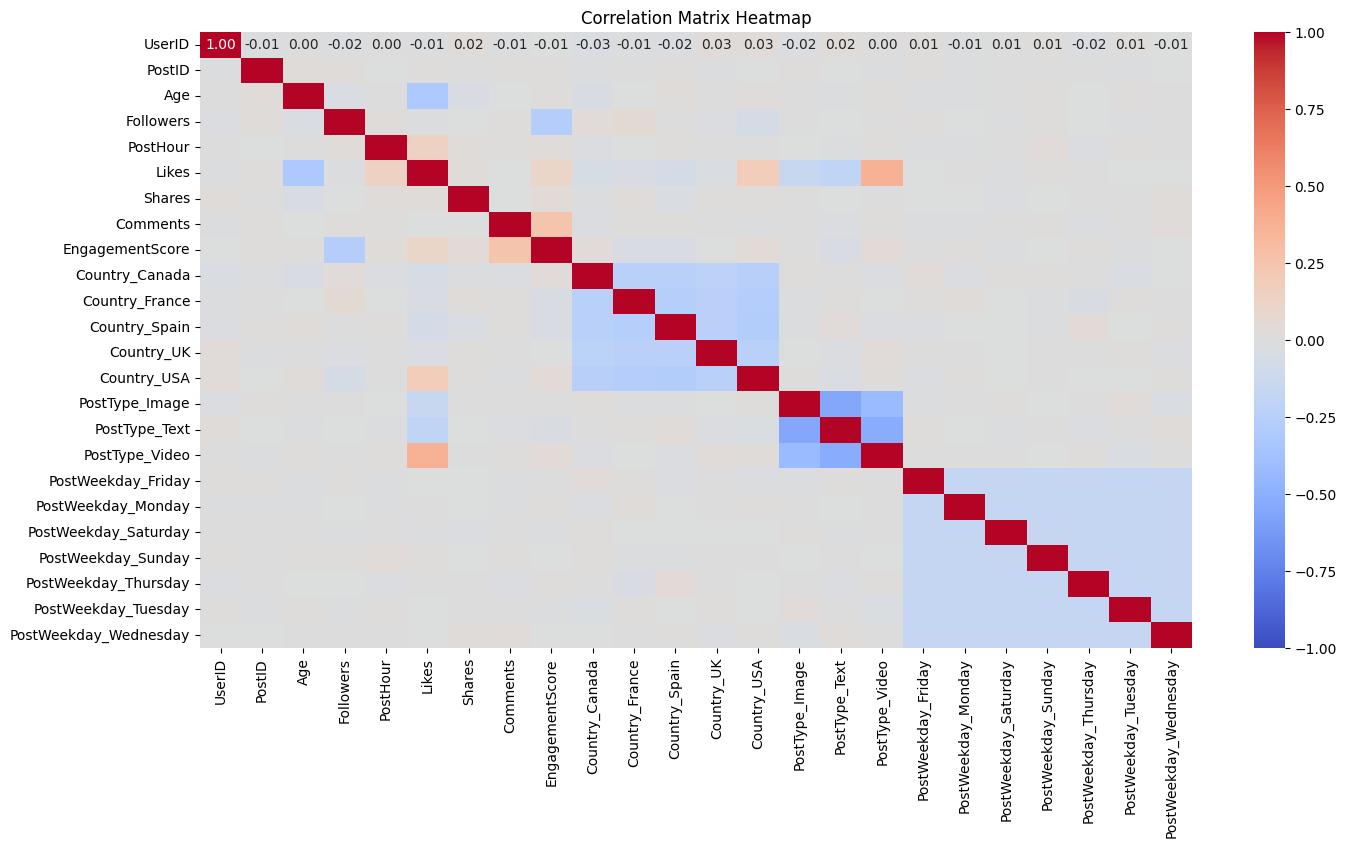

In [16]:
plt.figure(figsize=(16, 8))
sns.heatmap(encoded_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [18]:
# Split encoded_df into features (X) and target variable (y)
X = encoded_df.drop(["EngagementScore", "PostID", "UserID" ], axis=1)
y = encoded_df["EngagementScore"]

In [19]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Define updated hyperparameters for grid search
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True]
}

In [ ]:
# Grid search for Random Forest
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Get best parameters
rf_best_params = rf_grid_search.best_params_

# Train Random Forest model with best parameters
rf_best_model = RandomForestRegressor(random_state=42, **rf_best_params)
rf_best_model.fit(X_train, y_train)

# Predictions
rf_train_preds = rf_best_model.predict(X_train)
rf_test_preds = rf_best_model.predict(X_test)

In [22]:
# Define XGBoost parameters
xgb_params = {
    'colsample_bytree': 1.0,
    'gamma': 0,
    'learning_rate': 0.3,
    'max_depth': 3,
    'min_child_weight': 1,
    'n_estimators': 300,
    'reg_alpha': 0.1,
    'reg_lambda': 1,
    'subsample': 1.0
}

# Create XGBoost model with specified parameters
xgb_model = XGBRegressor(**xgb_params, random_state=42)

In [23]:
# Grid search for XGBoost
#xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
#xgb_model.fit(X_train, y_train)

# Get best parameters
#xgb_best_params = xgb_model.best_params_

# Train XGBoost model with best parameters
#xgb_best_model = XGBRegressor(random_state=42, **xgb_best_params)
xgb_model.fit(X_train, y_train)

# Predictions
xgb_train_preds = xgb_model.predict(X_train)
xgb_test_preds = xgb_model.predict(X_test) 

In [24]:
# Evaluate models
rf_train_rmse = mean_squared_error(y_train, rf_train_preds, squared=False)
rf_test_rmse = mean_squared_error(y_test, rf_test_preds, squared=False)

xgb_train_rmse = mean_squared_error(y_train, xgb_train_preds, squared=False)
xgb_test_rmse = mean_squared_error(y_test, xgb_test_preds, squared=False)

# Calculate MAE
rf_train_mae = mean_absolute_error(y_train, rf_train_preds)
rf_test_mae = mean_absolute_error(y_test, rf_test_preds)

xgb_train_mae = mean_absolute_error(y_train, xgb_train_preds)
xgb_test_mae = mean_absolute_error(y_test, xgb_test_preds)

# Calculate R-squared
rf_train_r2 = r2_score(y_train, rf_train_preds)
rf_test_r2 = r2_score(y_test, rf_test_preds)

xgb_train_r2 = r2_score(y_train, xgb_train_preds)
xgb_test_r2 = r2_score(y_test, xgb_test_preds)

print("Random Forest Train RMSE:", rf_train_rmse)
print("Random Forest Test RMSE:", rf_test_rmse)
print("XGBoost Train RMSE:", xgb_train_rmse)
print("XGBoost Test RMSE:", xgb_test_rmse)

print("Random Forest Train MAE:", rf_train_mae)
print("Random Forest Test MAE:", rf_test_mae)
print("XGBoost Train MAE:", xgb_train_mae)
print("XGBoost Test MAE:", xgb_test_mae)

print("Random Forest Train R-squared:", rf_train_r2)
print("Random Forest Test R-squared:", rf_test_r2)
print("XGBoost Train R-squared:", xgb_train_r2)
print("XGBoost Test R-squared:", xgb_test_r2)

Random Forest Train RMSE: 0.8396742420513834
Random Forest Test RMSE: 1.0236532003602847
XGBoost Train RMSE: 0.09316941921203942
XGBoost Test RMSE: 0.3063413901977589
Random Forest Train MAE: 0.213669872296697
Random Forest Test MAE: 0.4383848141705511
XGBoost Train MAE: 0.05266981783690897
XGBoost Test MAE: 0.10483837156565264
Random Forest Train R-squared: 0.9649258953451775
Random Forest Test R-squared: 0.8958117083373824
XGBoost Train R-squared: 0.999568171095849
XGBoost Test R-squared: 0.9906690775974784


c:\Users\serge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\serge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\serge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\serge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarnin

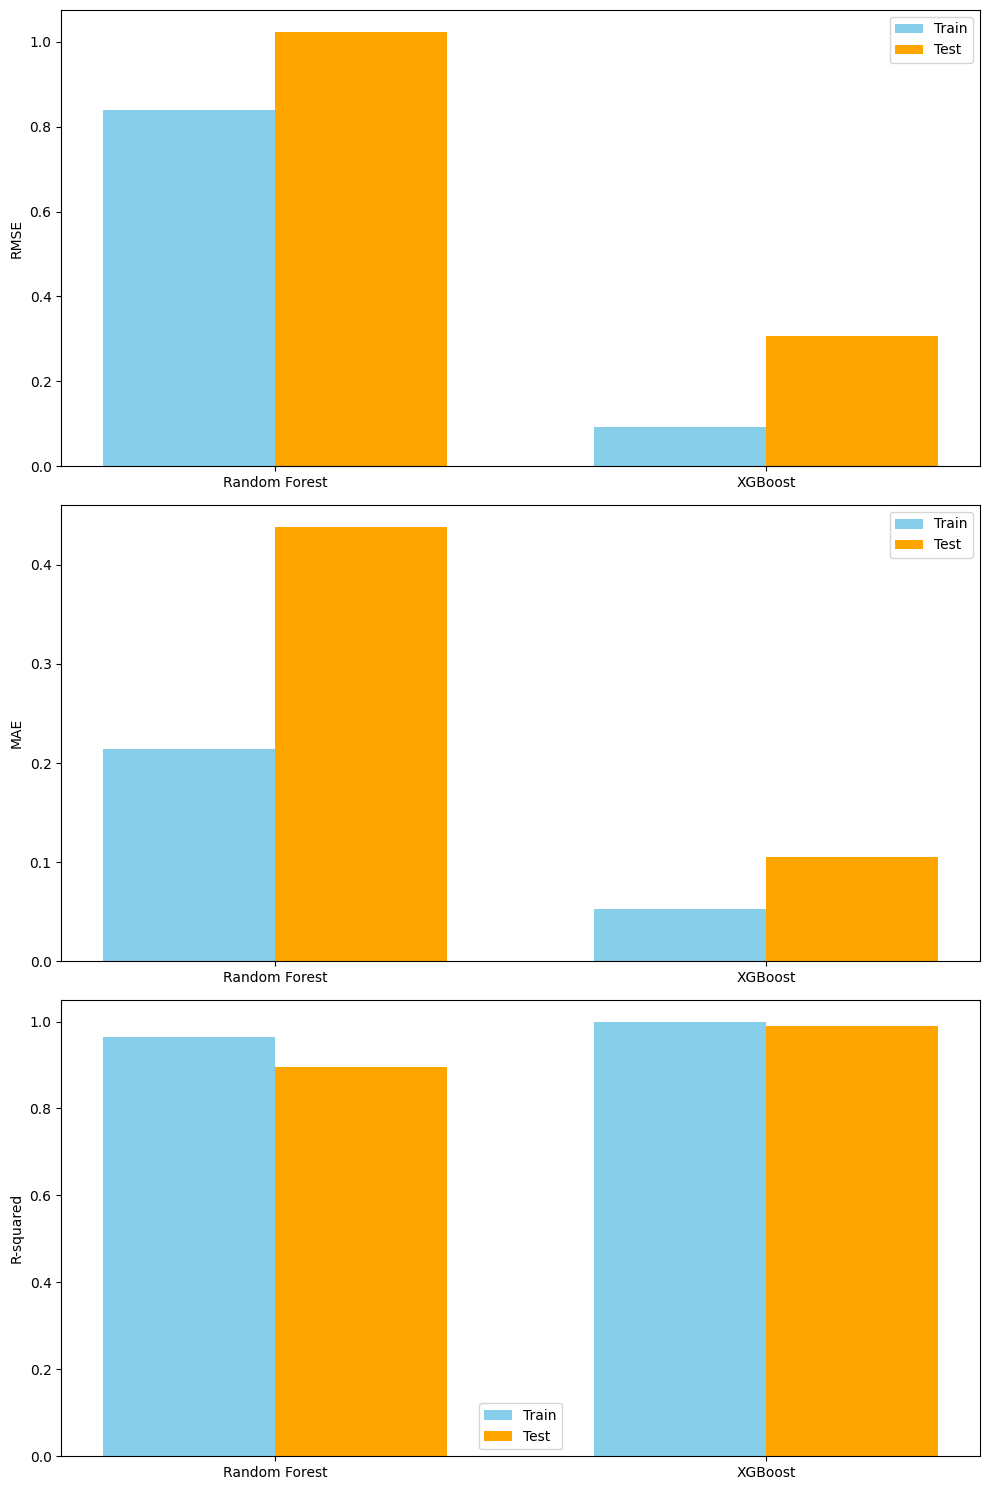

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics names
metrics_names = ['RMSE', 'MAE', 'R-squared']

# Random Forest metrics
rf_train_metrics = [rf_train_rmse, rf_train_mae, rf_train_r2]
rf_test_metrics = [rf_test_rmse, rf_test_mae, rf_test_r2]

# XGBoost metrics
xgb_train_metrics = [xgb_train_rmse, xgb_train_mae, xgb_train_r2]
xgb_test_metrics = [xgb_test_rmse, xgb_test_mae, xgb_test_r2]

# Data for plotting
train_metrics = [rf_train_metrics, xgb_train_metrics]
test_metrics = [rf_test_metrics, xgb_test_metrics]
labels = ['Random Forest', 'XGBoost']

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

for i, ax in enumerate(axs):
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    ax.bar(x - width/2, [metrics[i] for metrics in train_metrics], width, color='skyblue', label='Train')
    ax.bar(x + width/2, [metrics[i] for metrics in test_metrics], width, color='orange', label='Test')
    ax.set_ylabel(metrics_names[i])
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

plt.tight_layout()
plt.show()


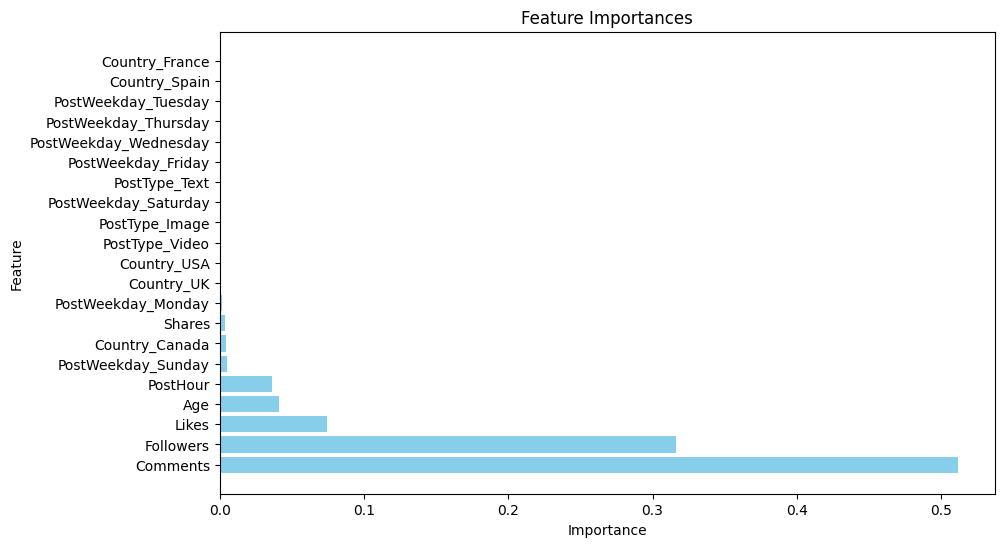

In [26]:
importances = xgb_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()